In [ ]:
# ------------------------------------------------------------
# Customer Churn Prediction Project
# Internship Task - Predicting Churn for Subscription-based Service
# Dataset: Churn_Modelling.csv
# ------------------------------------------------------------

# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Models and utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# To suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# ------------------------------------------------------------
# Step 1: Load the dataset
# ------------------------------------------------------------
df = pd.read_csv("Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# ------------------------------------------------------------
# Step 2: Initial Data Understanding
# ------------------------------------------------------------

# Display dataset structure
print("Shape of dataset:", df.shape)
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Shape of dataset: (10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB

Missing Values:
 RowNumber          0
CustomerId         0
Surn

In [ ]:
# ------------------------------------------------------------
# Step 3: Drop irrelevant columns
# 'RowNumber', 'CustomerId', and 'Surname' do not help in prediction
# ------------------------------------------------------------
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


In [ ]:
# ------------------------------------------------------------
# Step 4: Encoding Categorical Variables
# Geography and Gender are categorical — encode them
# ------------------------------------------------------------

# Label Encoding for 'Gender' (Binary category)
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])  # Male=1, Female=0

# One-hot encoding for 'Geography' (Nominal with >2 classes)
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)  # Avoid dummy variable trap
df.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [ ]:
# ------------------------------------------------------------
# Step 5: Define Features and Target
# ------------------------------------------------------------
X = df.drop('Exited', axis=1)   # Features
y = df['Exited']                # Target (1 = churned, 0 = retained)


In [ ]:
# ------------------------------------------------------------
# Step 6: Train-Test Split and Feature Scaling
# ------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for models sensitive to scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# ------------------------------------------------------------
# Step 7A: Logistic Regression Model
# ------------------------------------------------------------
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

print("🔹 Logistic Regression Performance:\n")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


🔹 Logistic Regression Performance:

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Accuracy: 0.811


In [ ]:
# ------------------------------------------------------------
# Step 7B: Random Forest Classifier
# ------------------------------------------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("🔹 Random Forest Performance:\n")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


🔹 Random Forest Performance:

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Accuracy: 0.866


In [ ]:
# ------------------------------------------------------------
# Step 7C: Gradient Boosting Classifier
# ------------------------------------------------------------
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("🔹 Gradient Boosting Performance:\n")
print(classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))


🔹 Gradient Boosting Performance:

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Accuracy: 0.8675


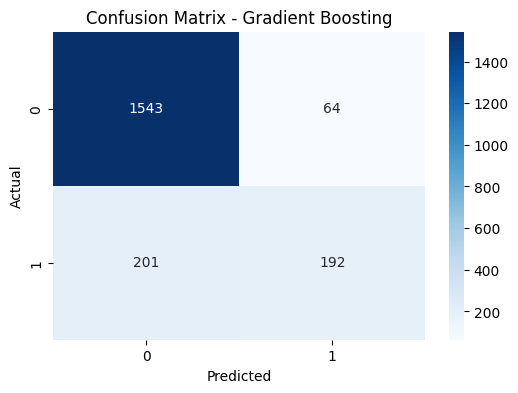

In [ ]:
# ------------------------------------------------------------
# Step 8: Confusion Matrix for Gradient Boosting
# ------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


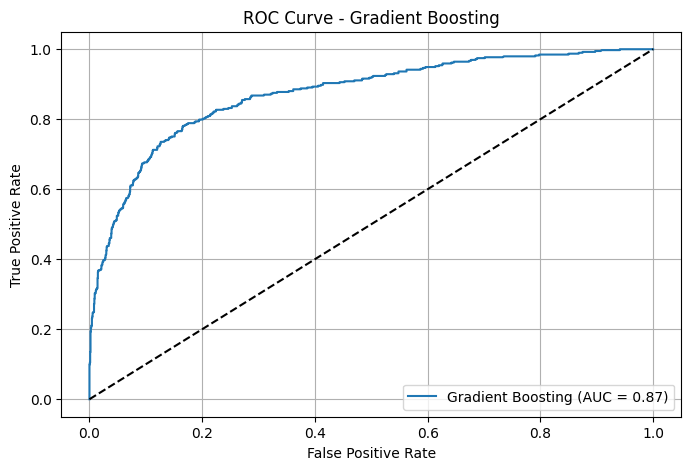

In [ ]:
# ------------------------------------------------------------
# Step 9: ROC Curve & AUC Score - Gradient Boosting
# ------------------------------------------------------------
y_proba = gb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label="Gradient Boosting (AUC = %0.2f)" % roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Curve - Gradient Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


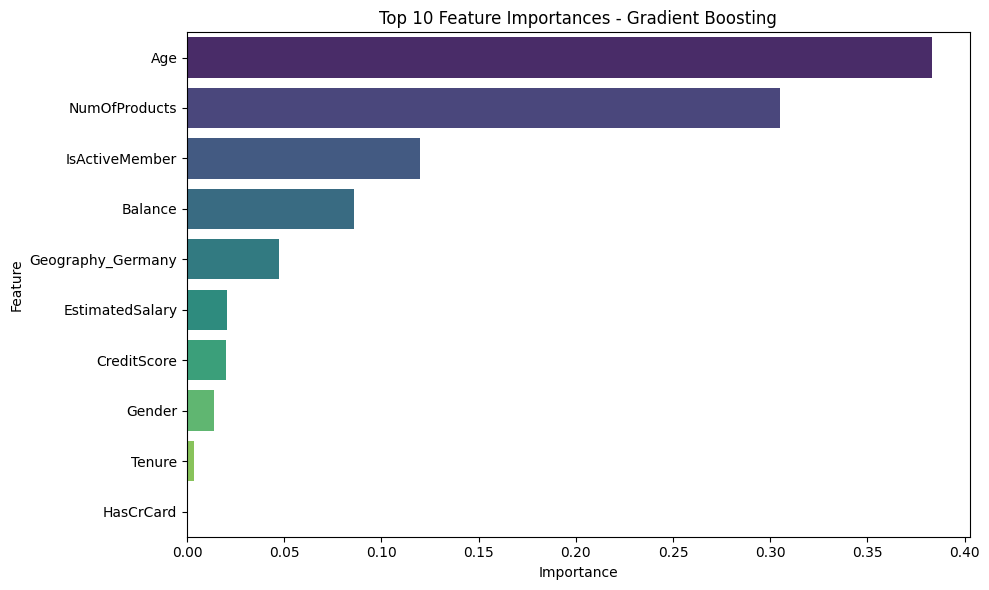

In [ ]:
# ------------------------------------------------------------
# Step 10: Feature Importance (Gradient Boosting)
# ------------------------------------------------------------
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10,6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Feature Importances - Gradient Boosting")
plt.tight_layout()
plt.show()
